In [1]:
# KNN(K nearest neighbor) is a supervised machine learning technique. It classifies a data based on its peer. In other words, by using the closest k data rows, it uses the label
# of the mode's(highest frequency). The closest data as I have said is calculated based on the Euclidean distance.
# One of it's limitation is that Taking a large k causes underfitting as the model the decision becomes less influenced by specific nearby points and more by the overall 
# majority class in the neighborhood. With a small 𝑘(e.g., 𝑘=1, the model makes predictions based solely on the single nearest neighbor.
#If this point is an outlier or noisy, the prediction will reflect that error.

In [22]:
import numpy as np
from collections.abc import Iterable

In [151]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))
    
def get_neighbours(X,Y,X_new,k):
    distances = []
    for i in range(len(X)):
        dist= euclidean_distance(X[i],X_new)
        distances.append((dist,Y[i]))

    distances.sort(key =lambda x:x[0])
    neighbors = [distances[i][1] for i in range(k)]
    return neighbors

def predict(X, y, X_new, k):
    answer_list = np.zeros(X_new.shape[0], dtype=int)  # Pre-allocate array
    for i in range(X_new.shape[0]):
        neighbors = get_neighbours(X, y, X_new[i], k)
        counts = np.bincount(neighbors)
        answer_list[i] = np.argmax(counts)  # Assign directly to the pre-allocated array
    return answer_list
        
    

In [140]:
X_train = np.array([
    [2,3],
    [1,1],
    [2.5,2],
    [6,6],
    [7,7],
    [5.5,5.5]
])

y_train = np.array([0,0,0,1,1,1])

x_new = np.array([[5,6]])

print(f"The predicted class is {predict(X_train,y_train,x_new,3)}")

The predicted class is [1]


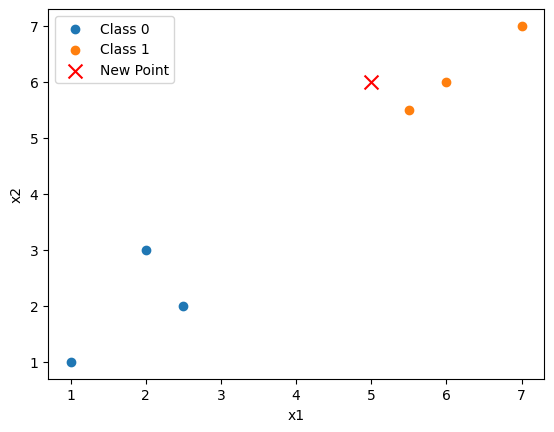

In [109]:
import matplotlib.pyplot as plt

for label in np.unique(y_train):
    plt.scatter(X_train[y_train==label][:,0],X_train[y_train == label][:,1],label=f"Class {label}")

plt.scatter(x_new[0],x_new[1],color='red',label='New Point',marker='x',s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [15]:
from sklearn.datasets import load_iris
data = load_iris()

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,train_size=0.8,random_state=42)

In [152]:
y_pred = predict(X_train,y_train,X_test,3)

In [153]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [154]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('KNN model from scratch')
print('Accuracy:',accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

KNN model from scratch
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [114]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions
y_pred2 = model.predict(X_test)

In [120]:
print('KNN model of sklearn')
print('Accuracy:',accuracy_score(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

KNN model of sklearn
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

